In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data=pd.read_csv("c:\\Users\\HP\\Documents\\kaggle\\project Data Science\\Untitled Folder\\reviewsiphone12.csv",index_col=0)

In [3]:
data.shape

(420, 3)

In [4]:
#data=data.drop("Unnamed: 0", axis=1)

In [5]:
data["Rating"]= data["r_rating"].apply(lambda x : int(x[0]))
data.drop("r_rating", axis=1, inplace=True)
review=data.drop("r_name",axis=1)
review=review.rename({'r_review ':'Review'},axis=1)
review.head()

,Review,Rating
0,\n\n\n\n\n The media could ...,1
1,\n\n Its my First Apple device. Happy to own ...,5
2,\n\n in a day use it starts hanging just usin...,1
3,\n\n Price is high and packing is torn and sc...,1
4,\n\n I went through a lot of reviews and arti...,5


In [40]:
review["sentiment"]= review["Rating"].map({1: 0, 2:0,3:1, 4: 1, 5:1})

In [41]:
review.head()

,Review,Rating,sentiment
0,the media could not be loa...,1,0
1,its my first apple device happy to own it af...,5,1
2,in a day use it starts hanging just using wh...,1,0
3,price is high and packing is torn and scratched,1,0
4,i went through a lot of reviews and articles...,5,1


<AxesSubplot:ylabel='Rating'>

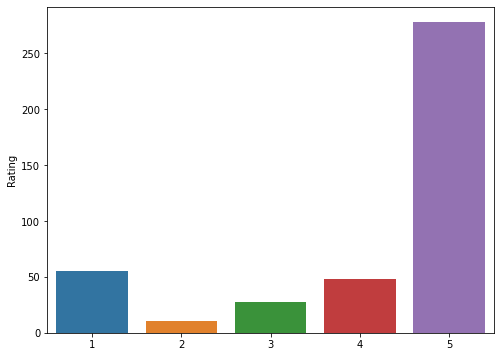

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(x=review.Rating.value_counts().index, y=review.Rating.value_counts())

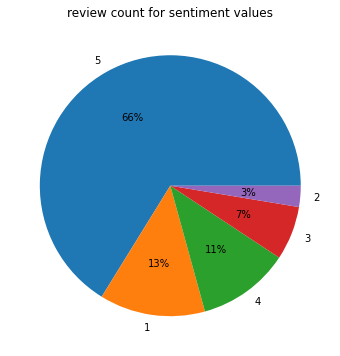

In [43]:
plt.figure(figsize=(8,6))
plt.pie(review.Rating.value_counts(), labels=review.Rating.value_counts().index,autopct='%.0f%%')
plt.title("review count for sentiment values")
plt.show()

<AxesSubplot:ylabel='sentiment'>

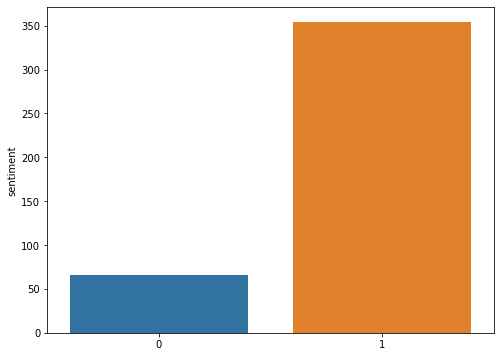

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x=review.sentiment.value_counts().index, y=review.sentiment.value_counts())

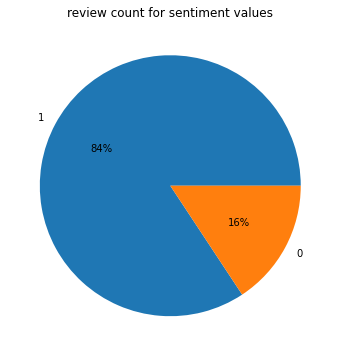

In [45]:
plt.figure(figsize=(8,6))
plt.pie(review.sentiment.value_counts(), labels=review.sentiment.value_counts().index,autopct='%.0f%%')
plt.title("review count for sentiment values")
plt.show()

In [46]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*\n\n\n*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    text = text.strip('\n')
    return text

clean = lambda x: clean_text(x)

In [47]:
review['Review']=review['Review'].apply(lambda x: clean(str(x)))

In [48]:
    review

,Review,Rating,sentiment
0,the media could not be loa...,1,0
1,its my first apple device happy to own it af...,5,1
2,in a day use it starts hanging just using wh...,1,0
3,price is high and packing is torn and scratched,1,0
4,i went through a lot of reviews and articles...,5,1
...,...,...,...
415,beast best battery life 🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥👍👍go for ...,5,1
416,not worth of buying iphone u can get cheaper...,2,0
417,rushikesh patel iphone best and good phonev...,5,1
418,camera is good but battery is poor capacity ...,3,1


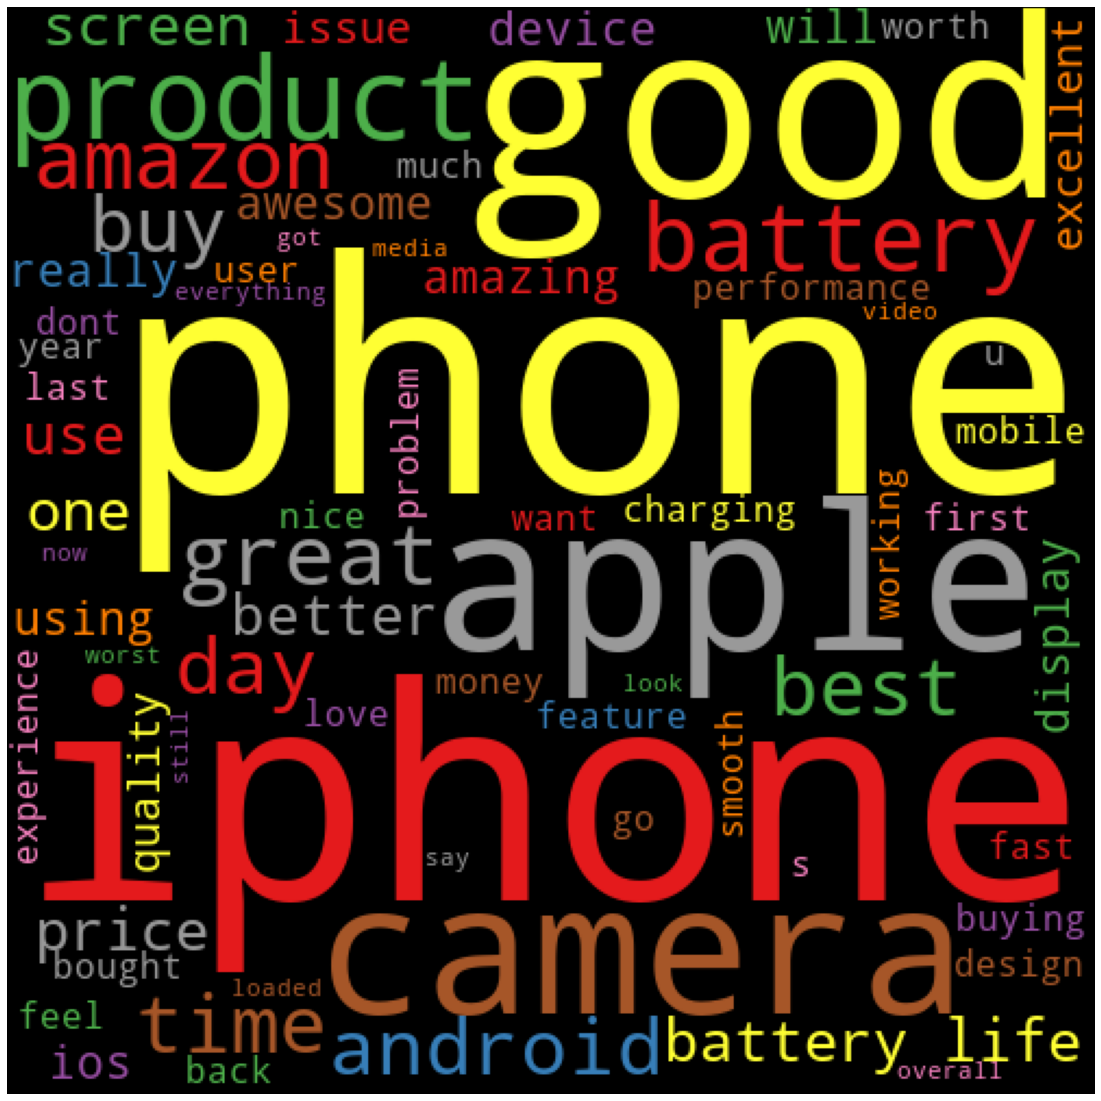

In [49]:
txt = ' '.join(review for review in review.Review)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=500,height=500,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(txt)
plot_cloud(wordcloud)

In [133]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [51]:
stopset=set(stopwords.words('english'))
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [52]:
y=review.sentiment

In [104]:
X=vectorizer.fit_transform(review['Review']).toarray()

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [119]:
model1=MB()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [120]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8571428571428571
[[  0  18]
 [  0 108]]


In [121]:
model2=GB()
model2.fit(X_train, y_train)
y_pred=model2.predict(X_test)

In [122]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7063492063492064
[[ 4 14]
 [23 85]]


In [123]:
model3= LogisticRegression()
model3.fit(X_train, y_train)
y_pred =model3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))

[[  0  18]
 [  0 108]]


0.8571428571428571


In [125]:
model4 = SVC()
model4.fit(X_train, y_train)
y_pred =model4.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))

[[  0  18]
 [  0 108]]


0.8571428571428571


In [129]:
model5= RandomForestClassifier()
model5.fit(X_train,y_train)
y_pred =model5.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))

[[  1  17]
 [  0 108]]


0.8650793650793651


In [130]:
model6= AdaBoostClassifier(n_estimators=500 , random_state=42)
model6.fit(X_train, y_train)
y_pred =model6.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))

[[  2  16]
 [  6 102]]


0.8253968253968254


In [132]:
model7 = GradientBoostingClassifier(n_estimators=500, random_state=42,learning_rate=0.01)
model7.fit(X_train, y_train)
y_pred =model7.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(accuracy_score(y_test, y_pred))

[[  2  16]
 [  5 103]]


0.8333333333333334
